First execute this code.Otherwise the programme may not work properly..

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("Libraries imported successfully!")

Libraries imported successfully!



 create a `doubleSlit` object using its associated function. All of its arguments are optional, so you do not need to put anything in the parentheses yet.


###### **Solution**


In [ ]:
my_experiment = doubleSlit()


** use the appropriate method of the `doubleSlit` object to display the screen.

###### **Solution**


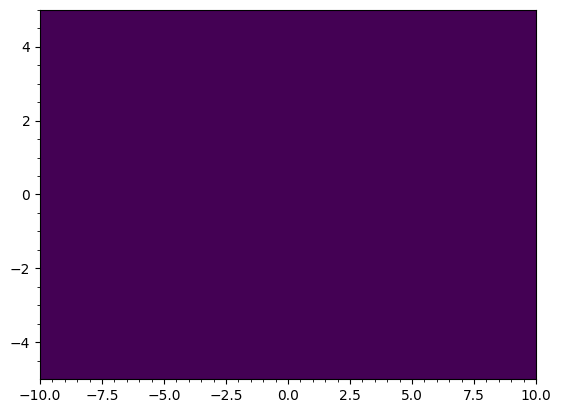

In [ ]:
my_experiment.show_screen()


**Together,** use the appropriate method of the `doubleSlit` object to fire a single electron at the screen. Then, display the screen again.

###### **Solution**


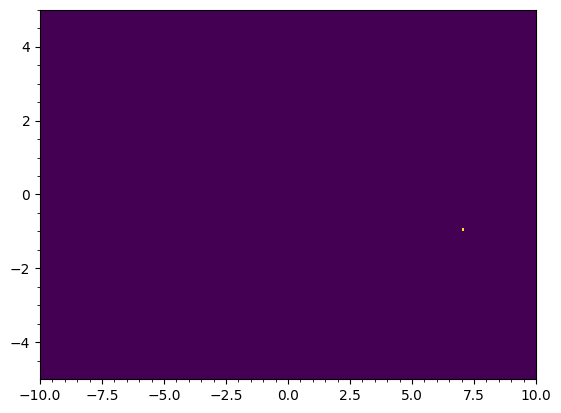

In [ ]:
my_experiment.fire_electron()
my_experiment.show_screen()

######**Solution**

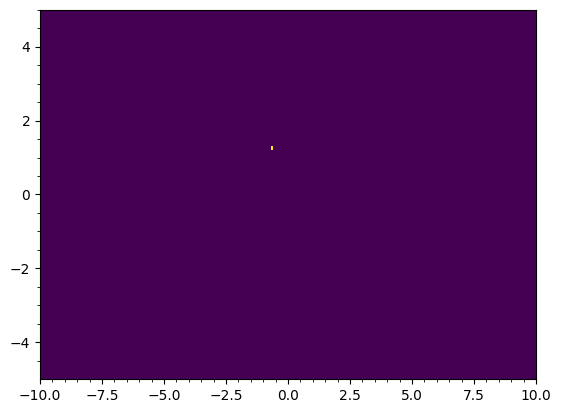

In [ ]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.fire_electron()
my_experiment.show_screen()

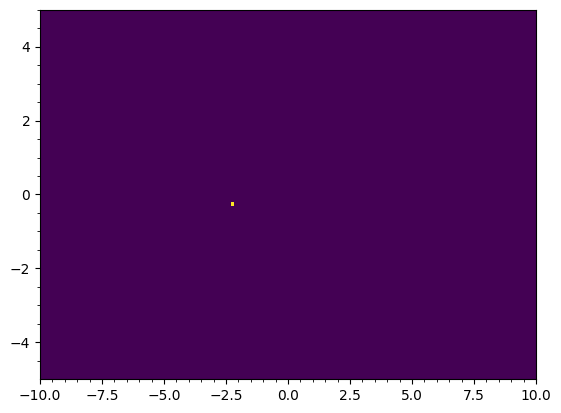

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.fire_electron()
my_experiment.show_screen()

use the appropriate method to fire 500 electrons at the screen. Then, display the screen.

######**Solution**

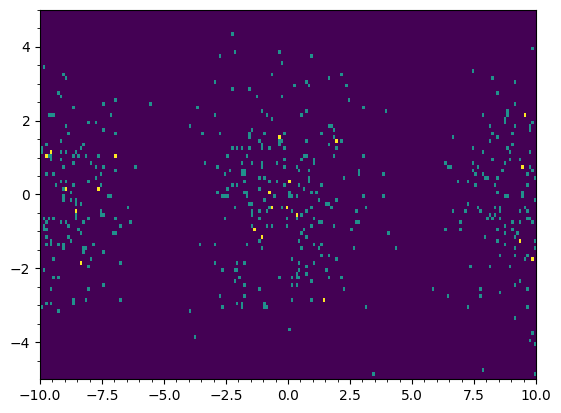

In [ ]:
my_experiment = doubleSlit()
my_experiment.electron_beam(num_electrons=500)
my_experiment.show_screen()

use the appropriate method to fire 10,000 electrons at the screen. Then, display the screen.

###### **Solution**


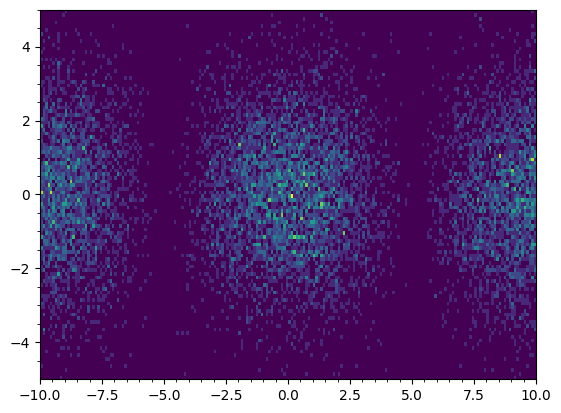

In [ ]:
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire 10000 electrons and display the screen.

######**Solution**

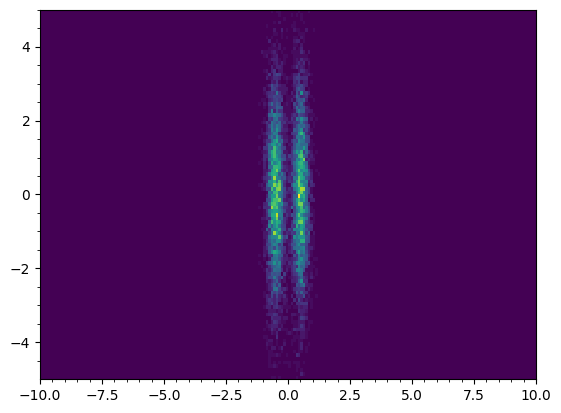

In [ ]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

######**Solution**

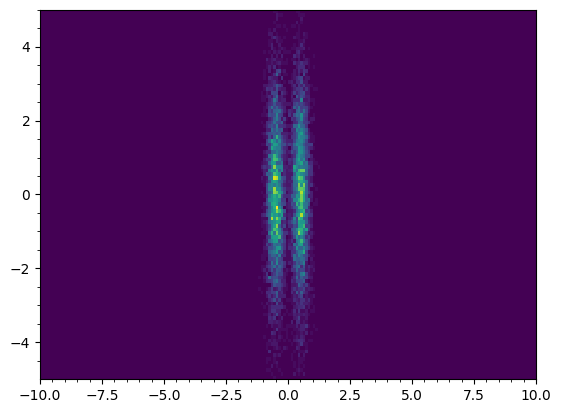

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

###### **Solution**


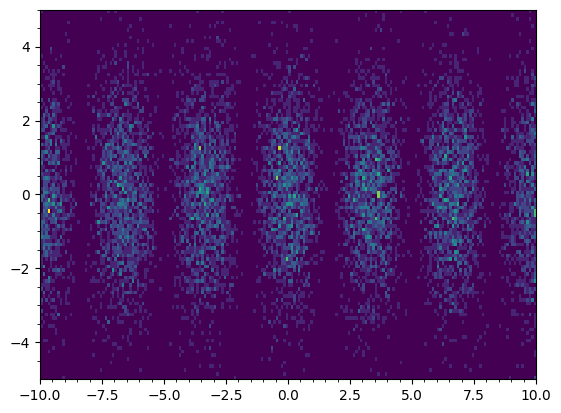

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

###### **Solution**


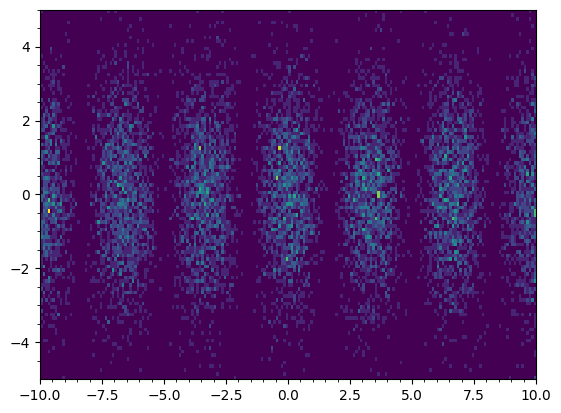

In [ ]:
my_experiment = doubleSlit(slit_dist=3)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

create a `doubleSlit` object with a slit distance of 6, and fire an electron beam of 10,000 electrons. How do you expect this to compare to the slit distance of 3?

##### **Solution**


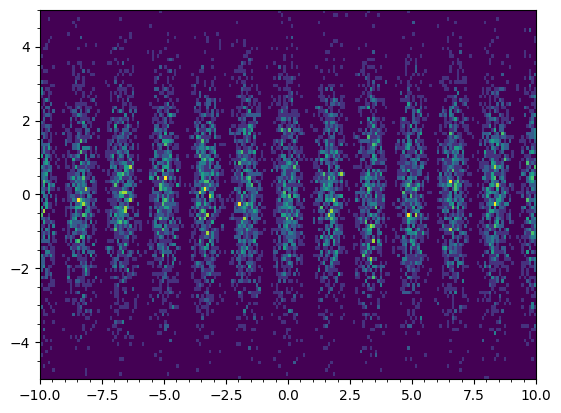

In [ ]:
my_experiment = doubleSlit(slit_dist=6)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

 create a `doubleSlit` object with a slit distance of 50, and fire an electron beam of 10,000 electrons.

######**Solution**

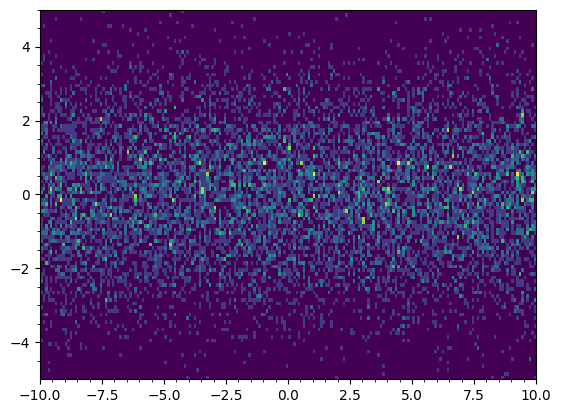

In [ ]:
my_experiment = doubleSlit(slit_dist=50)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

 explore how changing the distance between the slits changes the interference patters. For what range of slit distances do you see an interference pattern? Print the range that you find. **Note:** Do not measure the slit.


###### **Solution**


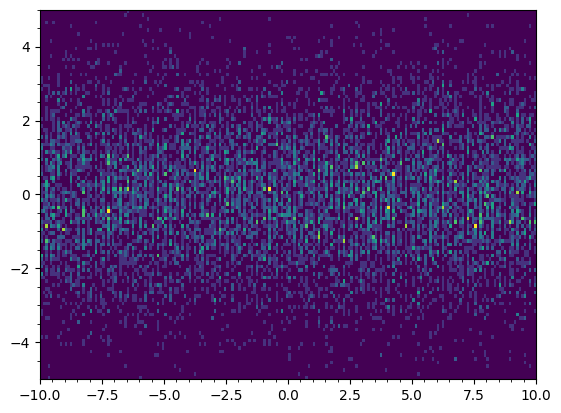

0.7-40


In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 40
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print("0.7-40")  #Approximately

Ans: 0.7-40 (about)

 modify the code from Problem #3.6 to find the distances between bright spots for the following distances between the slit and the screen:
*  1
*  1.5
*  2
*  2.5
*  5
*  10

Keep the slit distance at its default value of 1. Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


In [ ]:
distances_to_screen = [1,1.5,2,2.5,5,10]
bright_spot_distances = # COMPLETE THIS CODE

plt.plot(distances_to_screen,bright_spot_distances)
plt.xlabel("Distance Between Slits and Screen")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

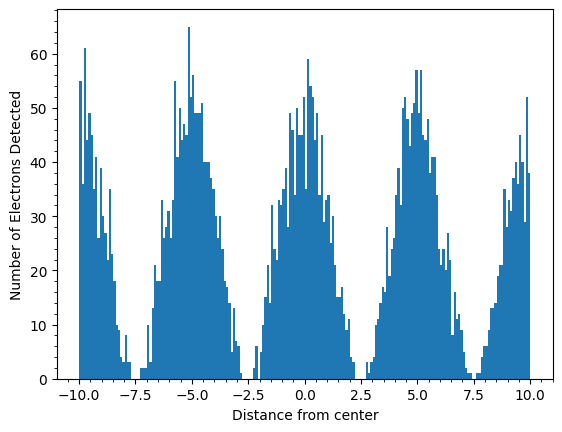

In [ ]:
my_experiment = doubleSlit()
my_experiment.distance_to_screen = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

Text(0, 0.5, 'Distance Between Bright Spots in Interference Pattern')

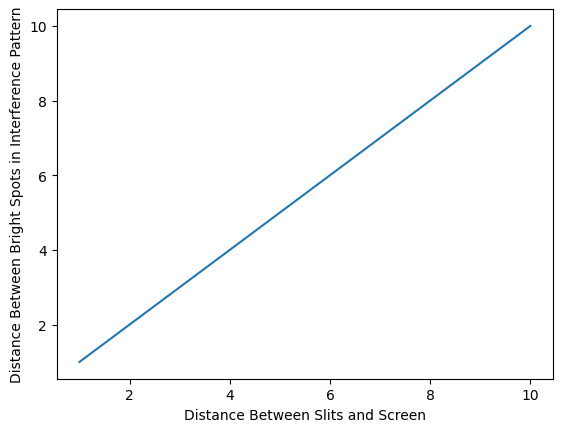

In [ ]:
distances_to_screen = [1,1.5,2,2.5,5,10]
bright_spot_distances = [1,1.5,2,2.5,5,10]

plt.plot(distances_to_screen,bright_spot_distances)
plt.xlabel("Distance Between Slits and Screen")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")


The plot shown below was generated with a `distance_to_screen` of 20. What `slit_dist` was used?

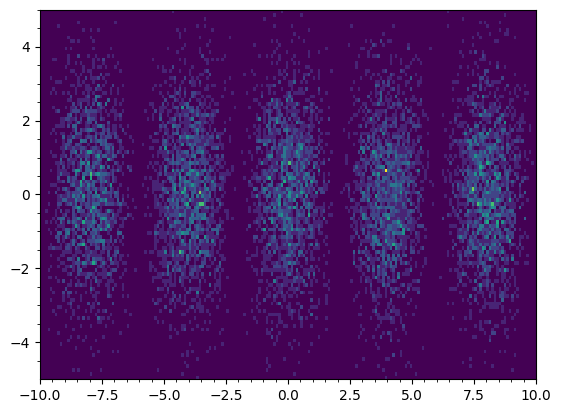

###### **Solution**


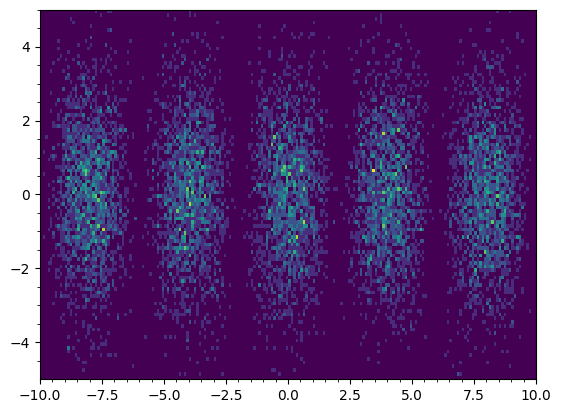

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.distance_to_screen = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

 search through the documentation to find a way to create a histogram of the x coordinates of the detections. Then, create a `doubleSlit` object with a `slit_dist` of 3, fire 5,000 electrons at the screen, the display a histogram of the detections. Print the distance between the bright spots on the screen.

###### **Solution**


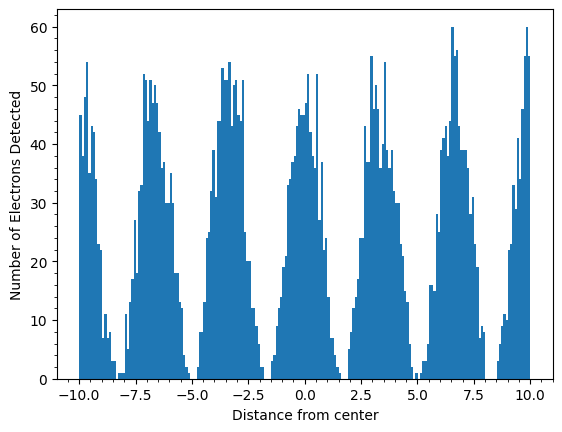

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

In [ ]:
print("~3.5")

~3.5


modify the code from problem #3.6 to find the distances between bright spots for the following slit distances:
*  1
*  1.5
*  2
*  5
*  10
*  20

Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [] #COMPLETE THIS LIST

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

###### **Solution**


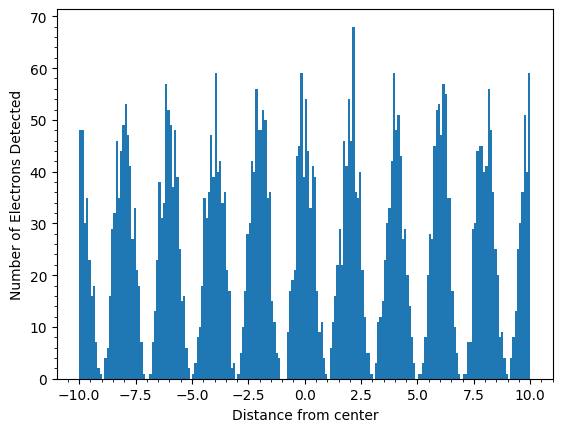

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

Text(0, 0.5, 'Distance Between Bright Spots in Interference Pattern')

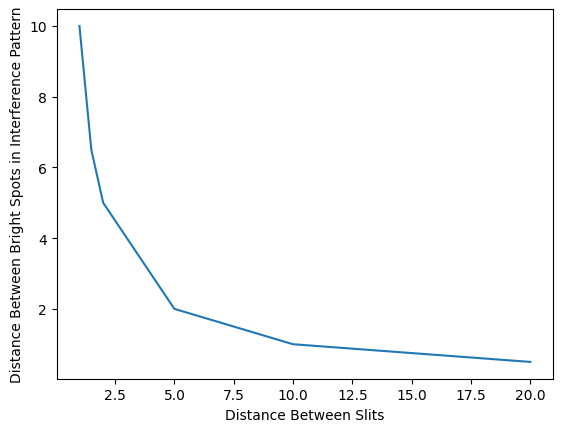

In [ ]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [10,6.5,5,2,1,0.5]

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")